<a href="https://colab.research.google.com/github/francescapoli98/pattern-recognition-systems/blob/main/midterm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intelligent Systems for Pattern Recognition: midterm 1**

#### Francesca Poli [560190]

##### **Assignment 3: signal processing**

The musical pitch of a note is determined by its fundamental frequency. The pitch played by different instruments sounds different due to harmonics, i.e. other frequencies that are superimposed and determine the timbre of the instrument. [This dataset](https://philharmonia.co.uk/resources/sound-samples/) contains samples from several instruments playing different notes. Plot the spectrogram for some of them (4 instruments are sufficient) and check if it is possible to recognize the different instruments by only looking at the spectrogram. In your presentation, discuss which samples you chose to compare, how you computed the spectrogram and whether the resulting features are sufficient to recognize the instrument.

In Python you can import WAVs (and acces several other music-related functions), using the [LibROSA](https://librosa.org/doc/latest/index.html) library.

#### Starting with LibROSA library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#some always-useful libraries
import numpy as np
import matplotlib.pyplot as plt

Let's get started with librosa!

In [3]:
%pip install librosa

%pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import librosa
print(librosa.__version__)

0.10.0


#### Loading the dataset with all instruments

In [5]:
import re
import os as os, fnmatch as f
from os import path 
from pydub import AudioSegment


dirpath = '/content/drive/MyDrive/ISPR/again/all-samples'

all_instruments=[]


for dir in os.listdir(dirpath):
  all_instruments.append(dir)
  #for i in os.listdir(dirpath+'/'+dir):
    #all_instruments.append(i)

In [6]:
#list of all the instruments at disposal
list(all_instruments)

#for key,value in all_instruments.items():
#  print(key,value)

['viola',
 'saxophone',
 'guitar',
 'percussion',
 'mandolin',
 'trumpet',
 'trombone',
 'oboe',
 'tuba',
 'violin',
 'contrabassoon',
 'flute',
 'clarinet',
 'banjo',
 'double bass',
 'bass clarinet',
 'french horn',
 'cor anglais',
 'bassoon',
 'cello']

I decide to allocate the instruments according to their musical family and I also choose four instruments to complete the initial task. 

Don't mind me if I go for a string quartet!

In [7]:
quartet = ['violin', 'viola', 'cello', 'double bass']
instruments={}

for elem in quartet:
  newpath=str(dirpath+'/'+elem)
  keyelem=elem.replace(' ','-')
  instruments[keyelem]=[]
  for filename in os.listdir(newpath):
    #sound = AudioSegment.from_mp3(newpath+'/'+filename)
    #filename= str(filename.removesuffix('.mp3')+'.wav')
    #sound = sound.export(filename, format="wav")
    instruments[keyelem].append(filename) #sound

for key, value in instruments.items():
  print(key, value)

violin ['violin_Cs4_025_pianissimo_arco-col-legno-battuto.mp3', 'violin_Cs4_025_mezzo-piano_pizz-glissando.mp3', 'violin_Cs4_15_mezzo-piano_arco-col-legno-tratto.mp3', 'violin_Cs4_1_mezzo-forte_arco-sul-ponticello.mp3', 'violin_Cs4_1_fortissimo_arco-normal.mp3', 'violin_Cs4_05_piano_arco-normal.mp3', 'violin_Cs4_05_mezzo-forte_arco-normal.mp3', 'violin_Cs4_025_piano_arco-col-legno-battuto.mp3', 'violin_Cs4_1_mezzo-piano_con-sord.mp3', 'violin_Cs4_1_mezzo-forte_arco-normal.mp3', 'violin_Cs4_05_forte_arco-normal.mp3', 'violin_Cs4_1_forte_con-sord.mp3', 'violin_Cs4_025_piano_arco-normal.mp3', 'violin_Cs4_05_fortissimo_arco-normal.mp3', 'violin_Cs4_1_mezzo-piano_non-vibrato.mp3', 'violin_Cs4_1_piano_arco-sul-tasto.mp3', 'violin_Cs4_phrase_mezzo-piano_arco-detache.mp3', 'violin_Cs4_long_piano_arco-sul-ponticello.mp3', 'violin_Cs4_very-long_mezzo-piano_arco-tremolo.mp3', 'violin_Cs4_long_mezzo-forte_molto-vibrato.mp3', 'violin_Cs4_long_mezzo-piano_non-vibrato.mp3', 'violin_Cs4_phrase_mezzo-f

In [8]:
sounds={}
for key,value in instruments.items():
  #keys=[]
  for i in value:
    sub = key.replace(' ','-')
    prefix = str(sub+'_')
    audio = i.removeprefix(prefix)
    if audio not in sounds:
      sounds[audio]=list()
      sounds[audio].append(key)
    else:
      sounds[audio].append(key)

##### Plot the spectrogram

Now I plot:
- the spectrogram for all the notes of every instrument, in order to have a nice general view 
- a spectrogram for every note throughout all the instruments to get the differences between each one of them and the pitches as requested.

In [9]:
import warnings
warnings.filterwarnings('ignore')

mysounds=[]

for key, value in sounds.items():
  if len(value)>3:
    if key not in mysounds:
      mysounds.append(key)

In [10]:
notes=[]
for s in mysounds:
  note = s[:s.index('_')]
  if note not in notes:
    notes.append(note)
list(notes)

['Cs4',
 'D4',
 'Ds4',
 'E4',
 'F4',
 'Fs4',
 'G3',
 'G4',
 'Gs3',
 'A3',
 'As3',
 'B3',
 'C4']

In [11]:
a=0
for sound in mysounds:
  if re.findall('(D4|Ds4)',sound):
    a+=1
print(a)

8


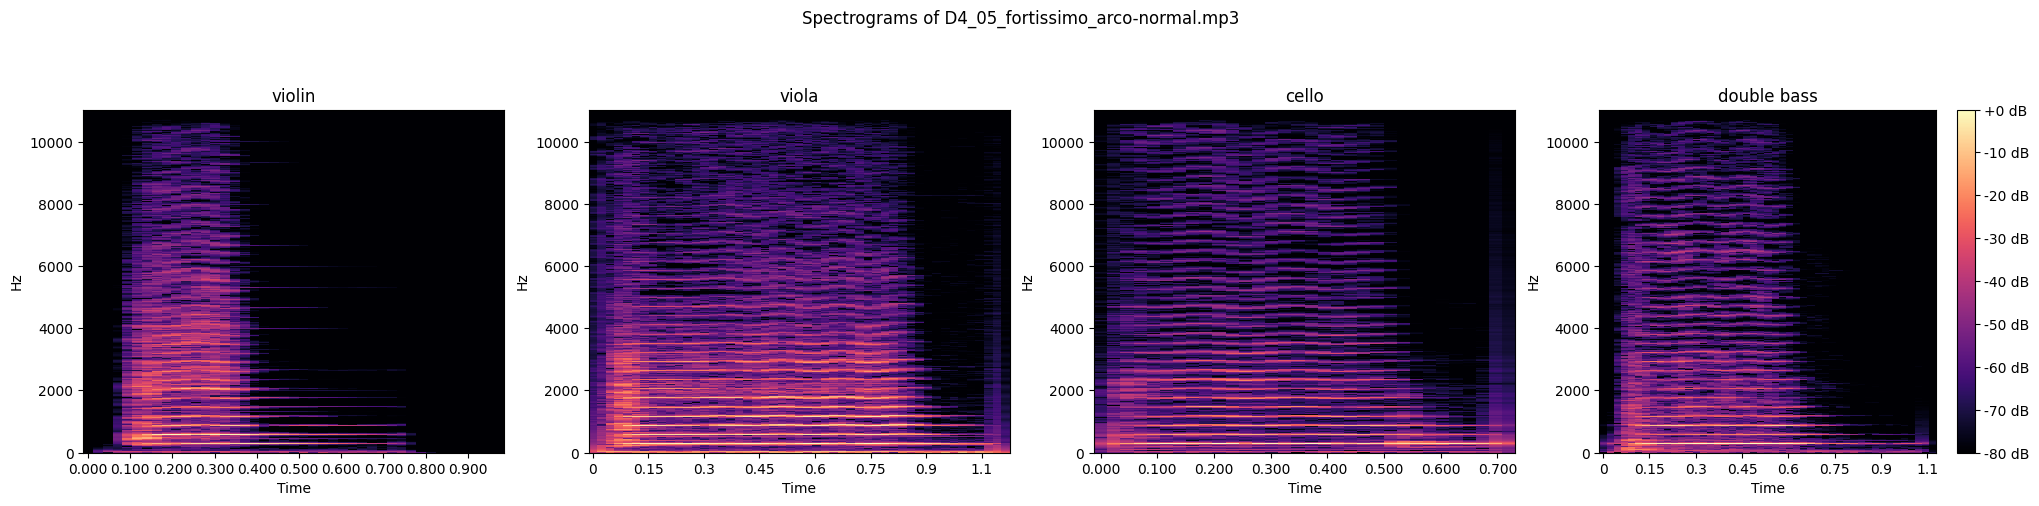

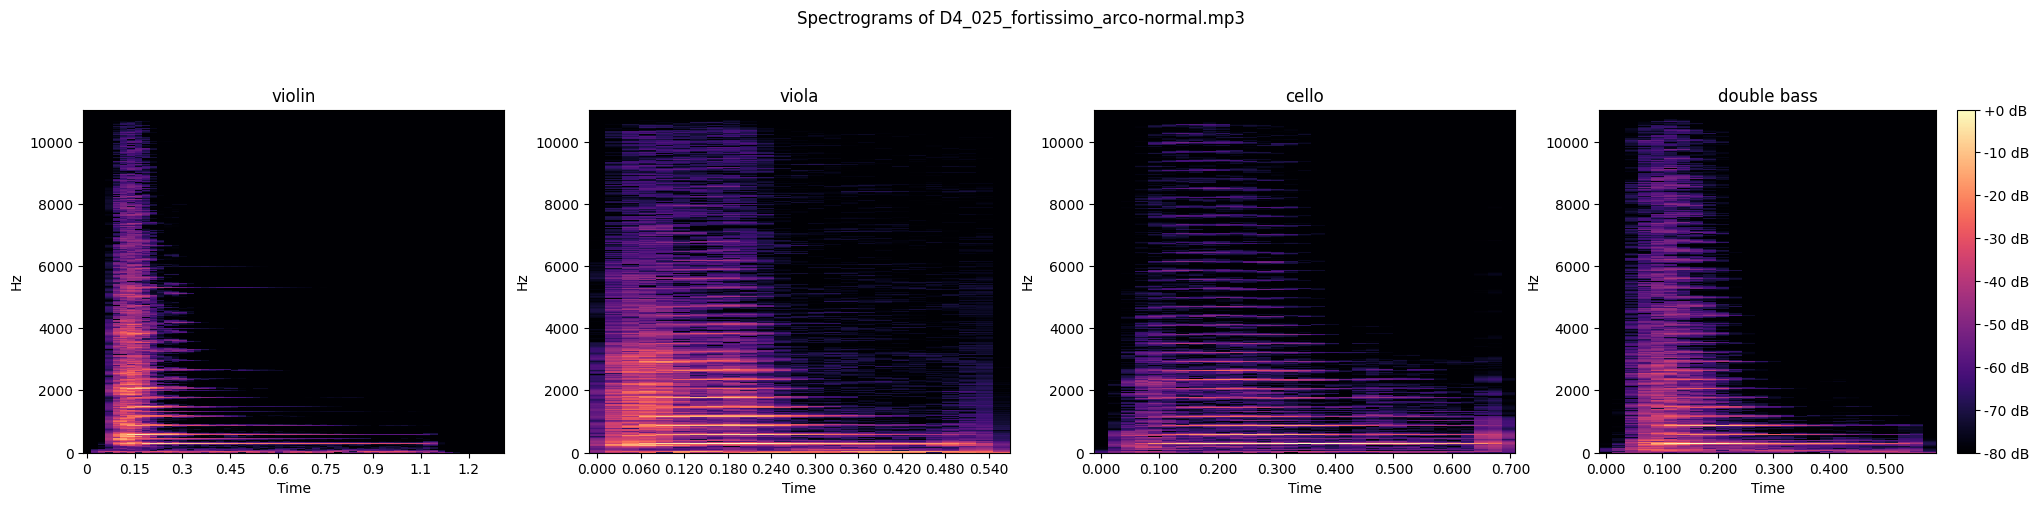

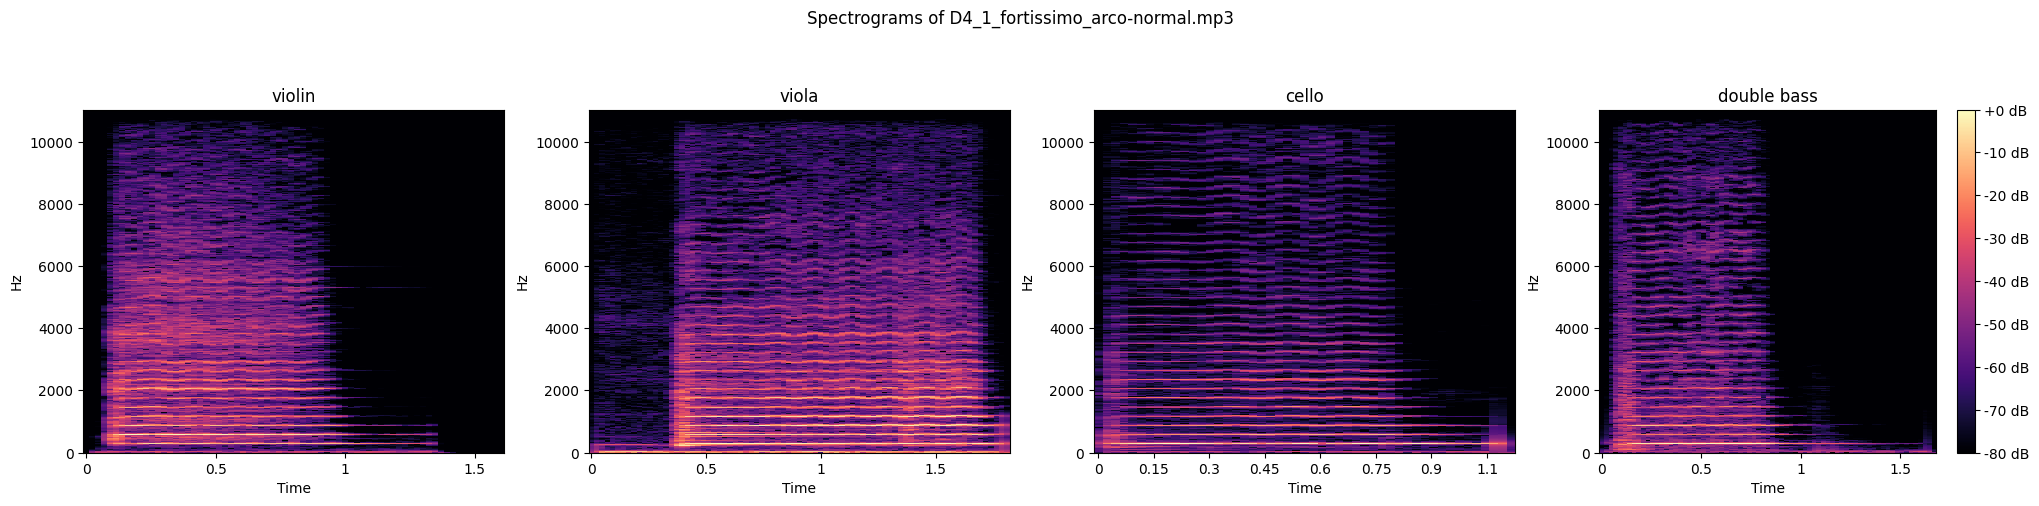

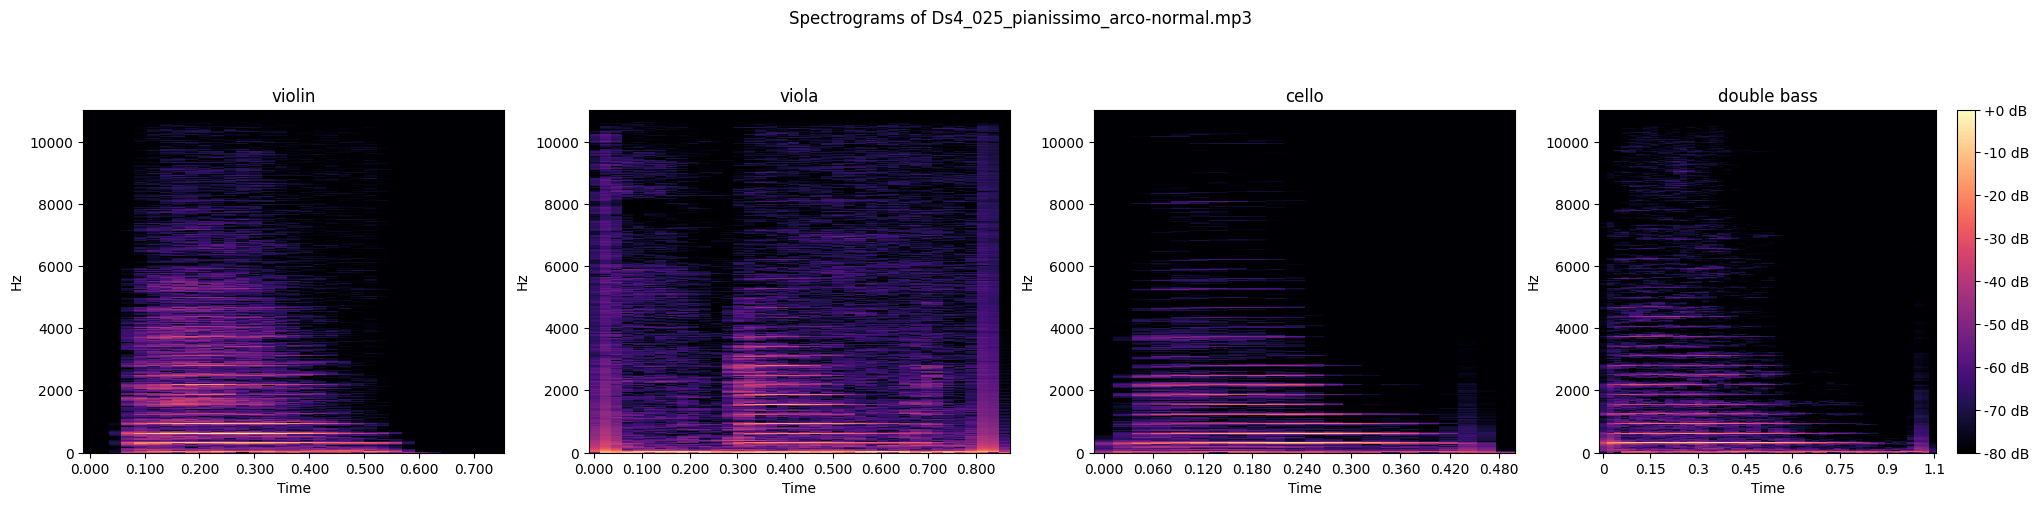

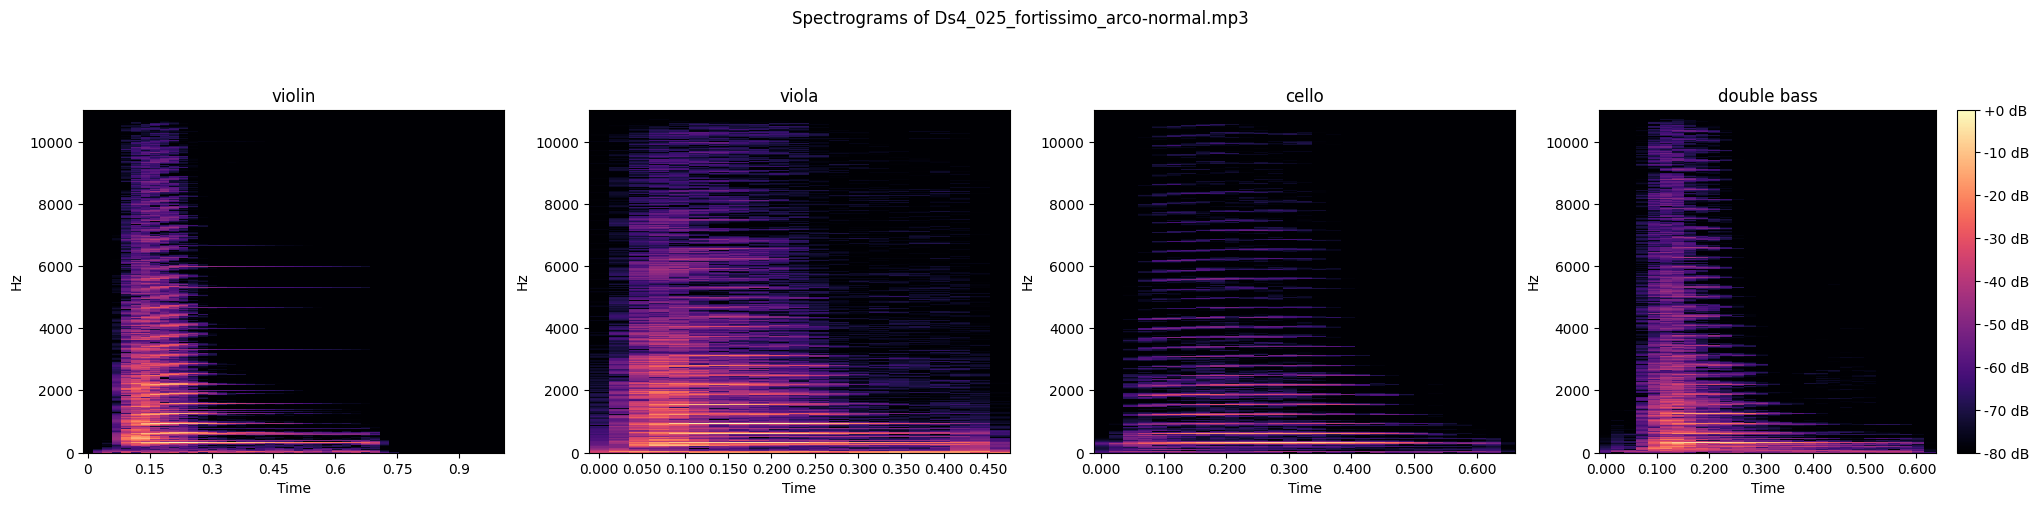

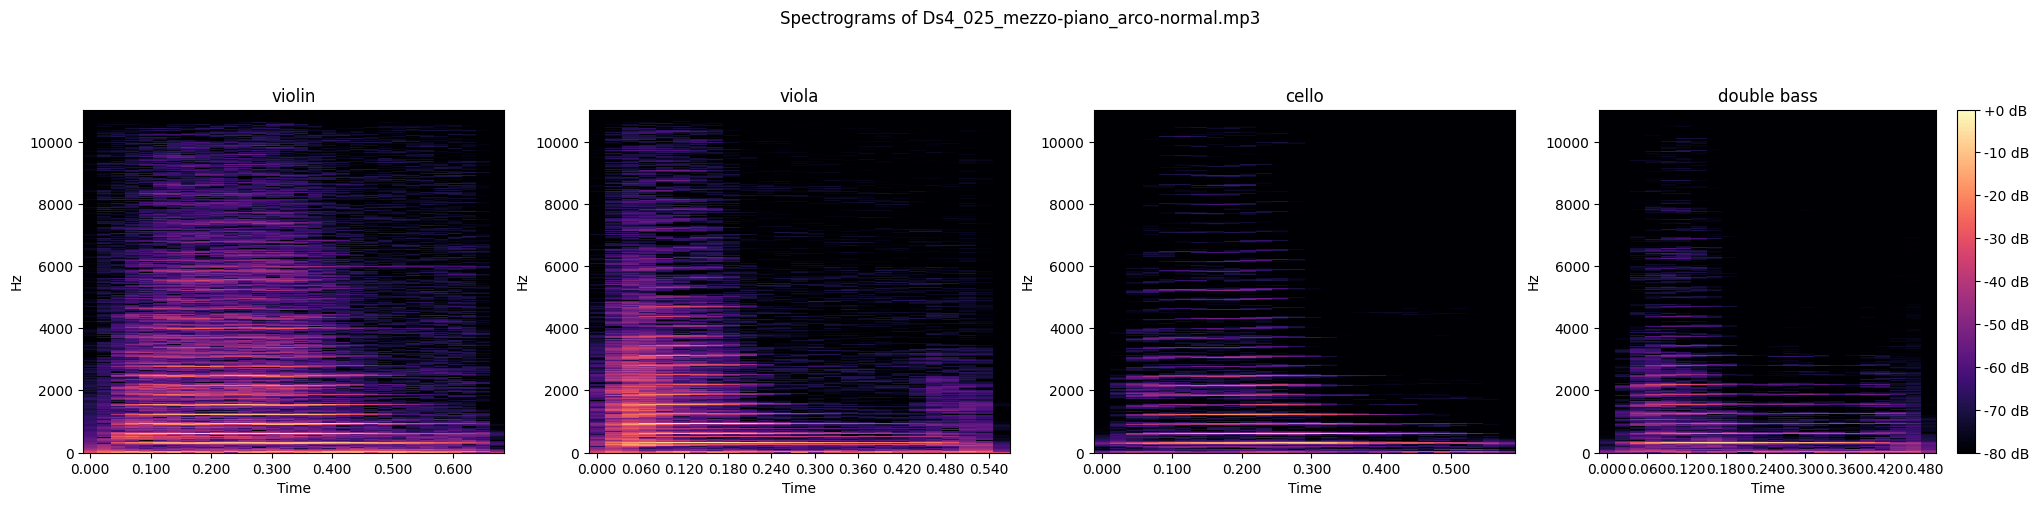

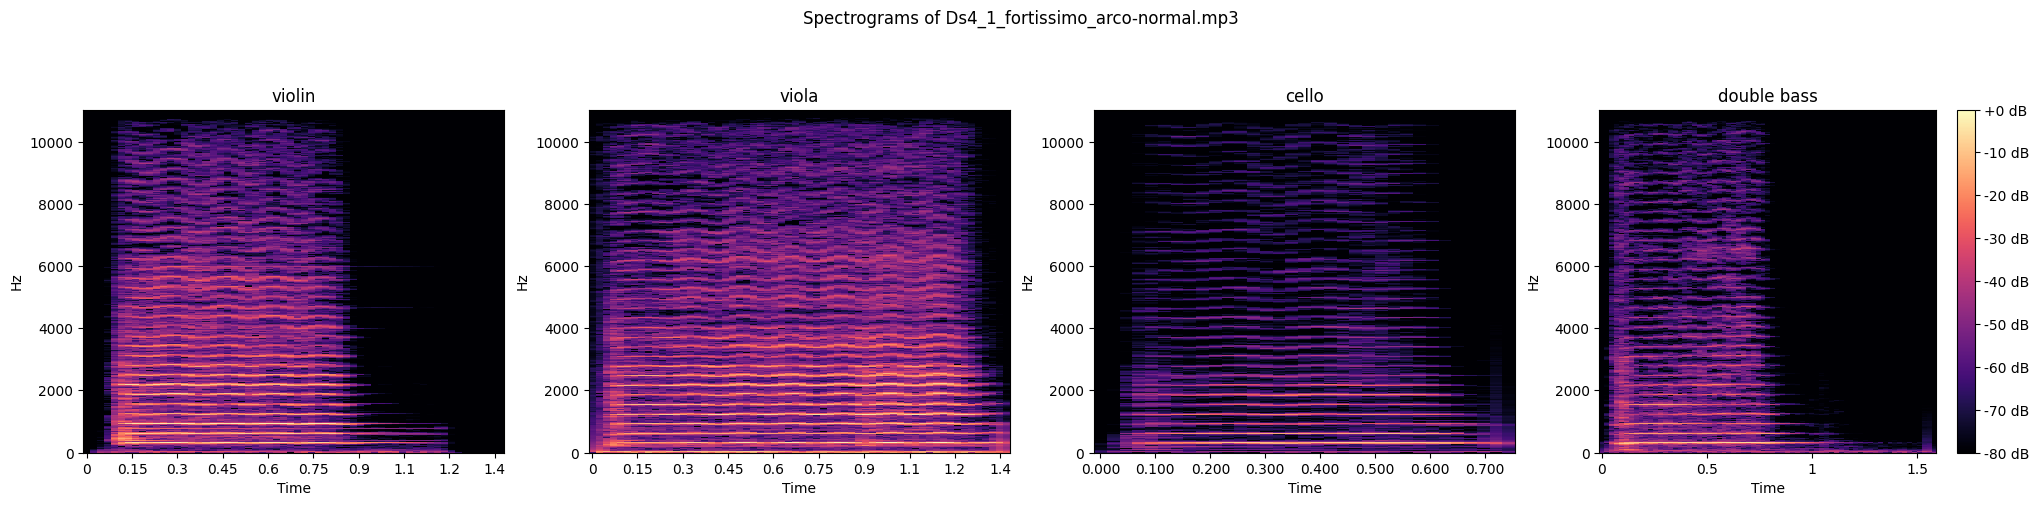

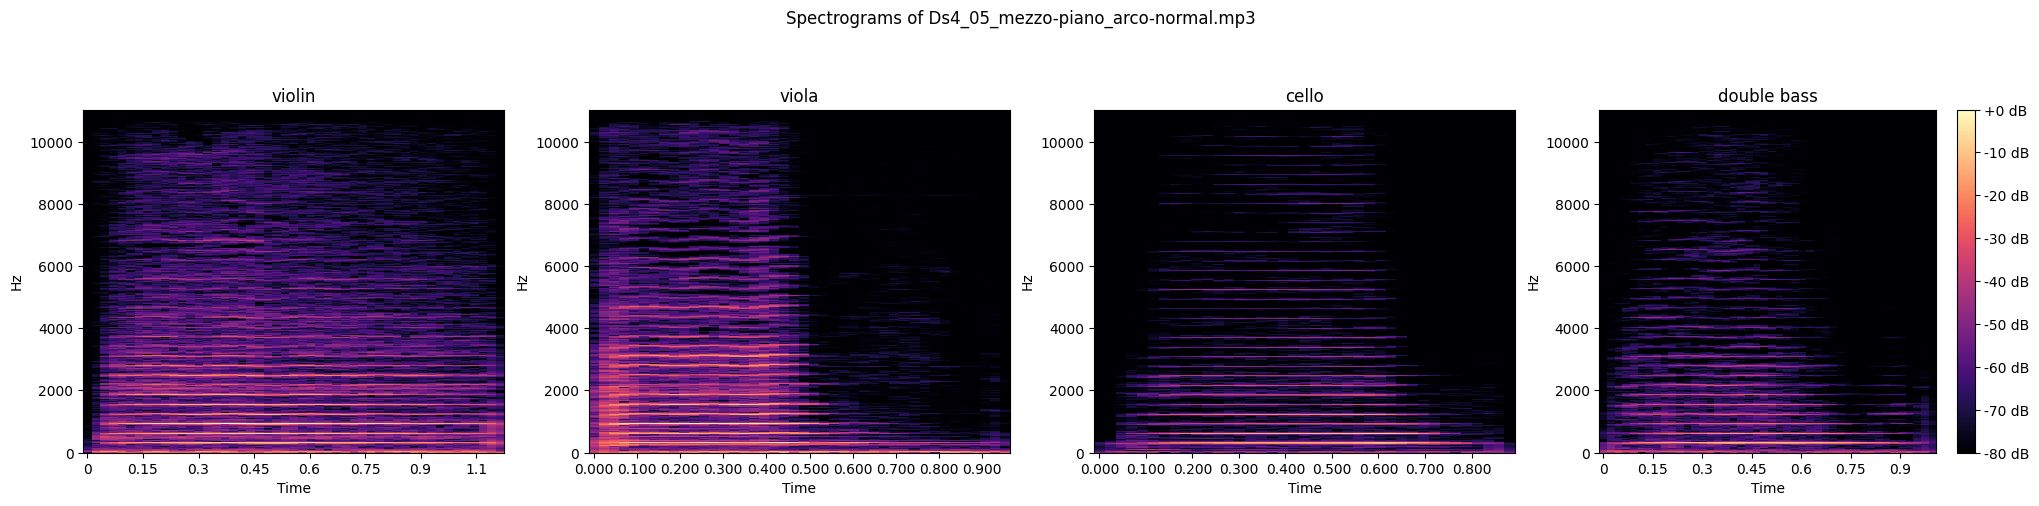

In [18]:
import librosa.display

for sound in mysounds:
  
  if re.findall('(D4|Ds4)', sound):

    fig = plt.figure(figsize=(25, 10), dpi=100) #figsize=(20, 25))
    fig.suptitle('Spectrograms of '+sound)

    k = 0

    for inst in quartet:

      for i in os.listdir(dirpath+'/'+inst):

        if f.fnmatch(i,'*{}'.format(sound)):
          #load files
          y, sr = librosa.load(dirpath+'/'+inst+'/'+i)
          # STFT of y
          D = librosa.stft(y)  
          #amplitude
          S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max) 
          
          #plot
          k=k+1
          ax = fig.add_subplot(2,4,k)
          ax.title.set_text(inst)
          img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
          
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    plt.show()

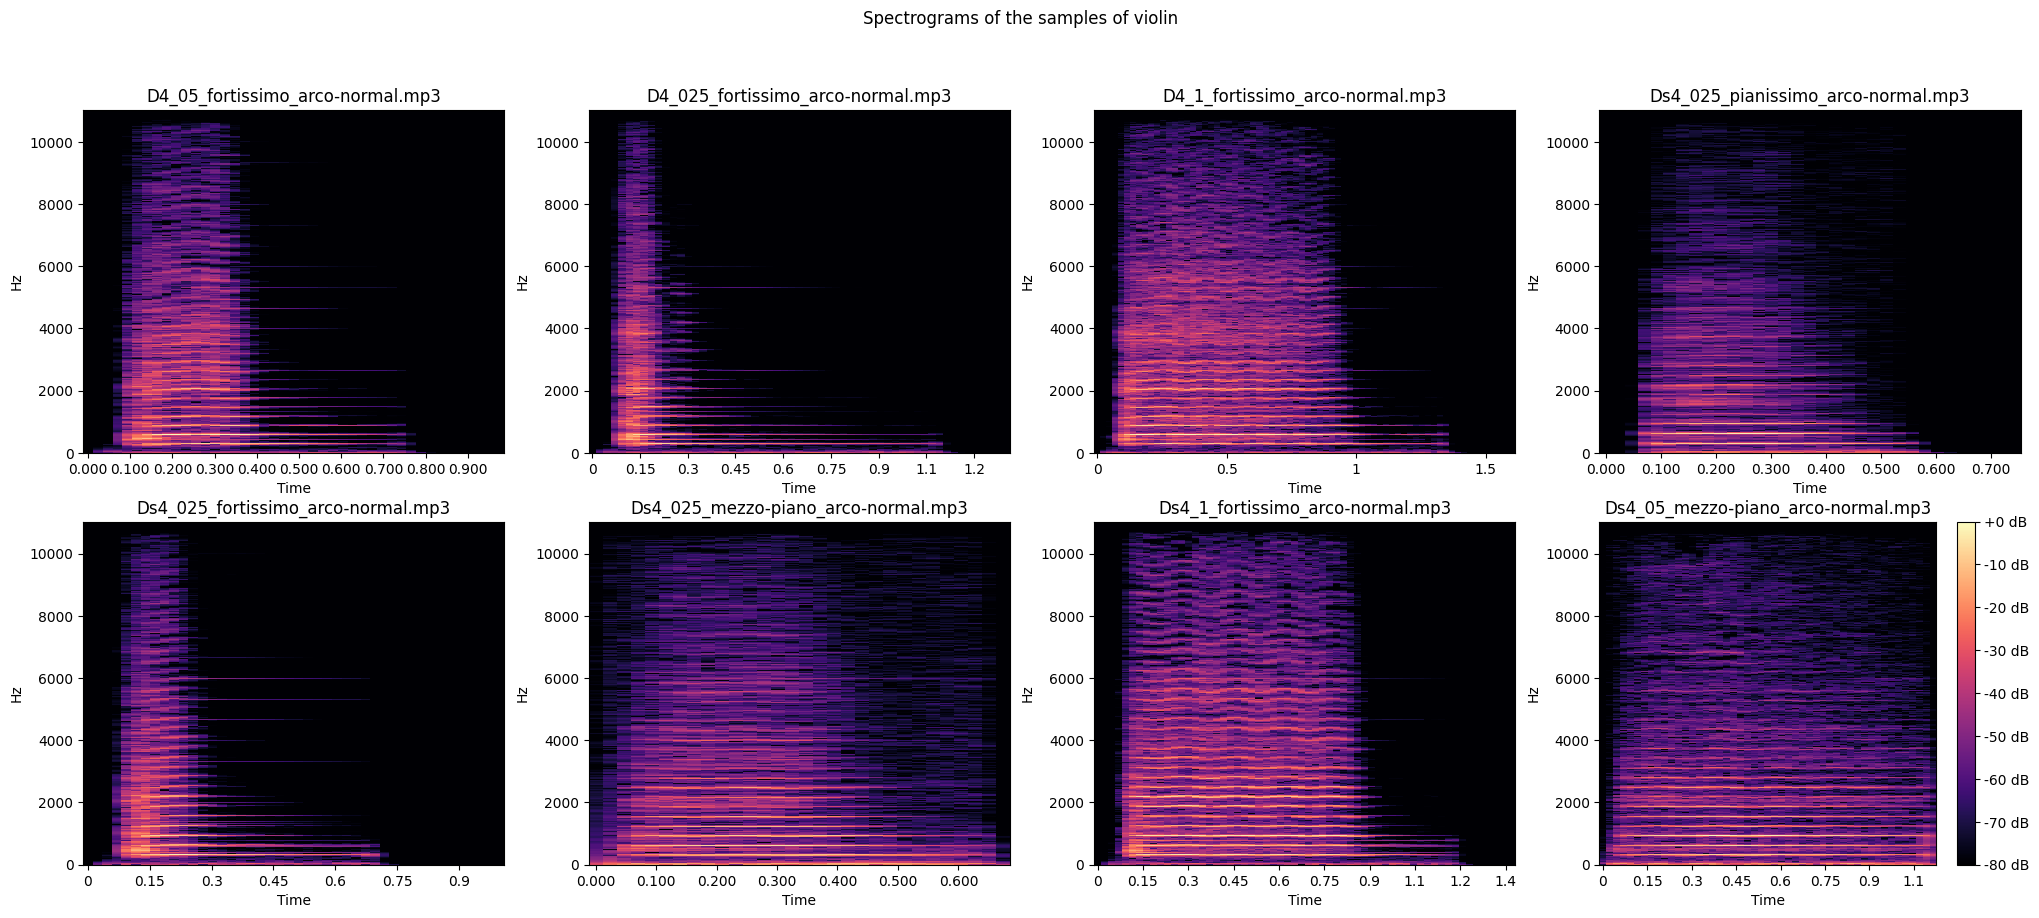

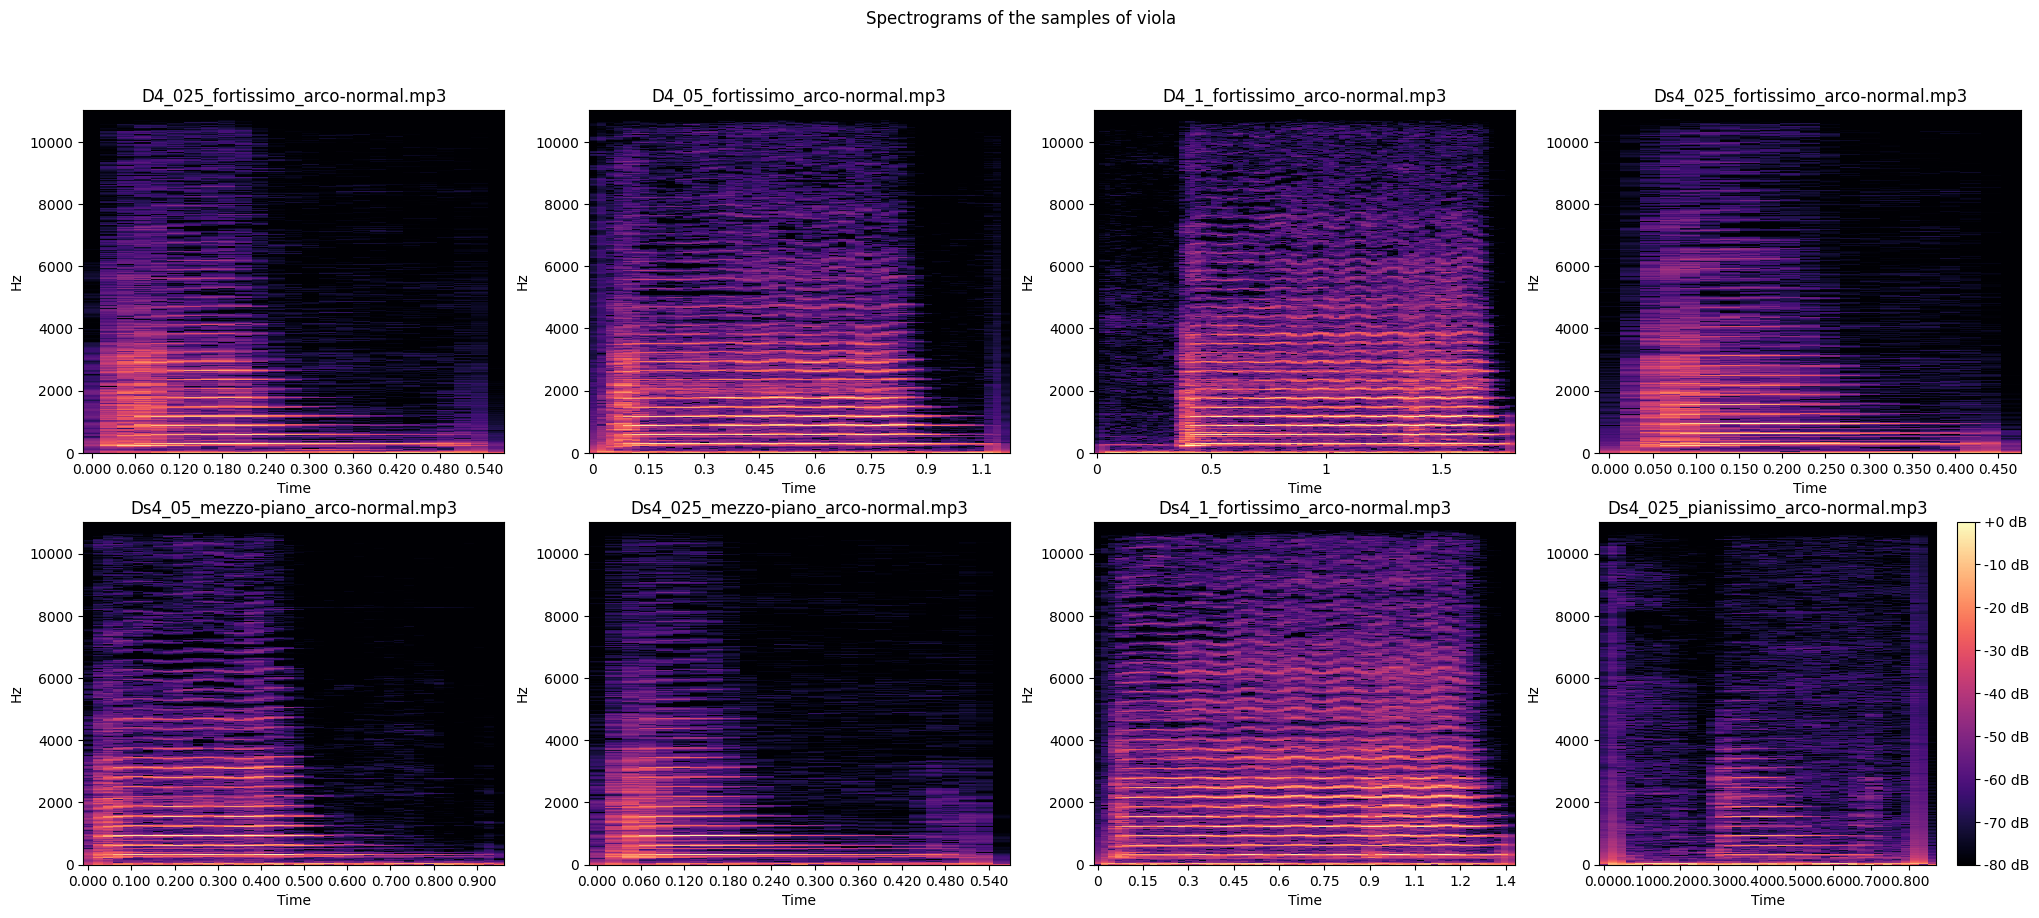

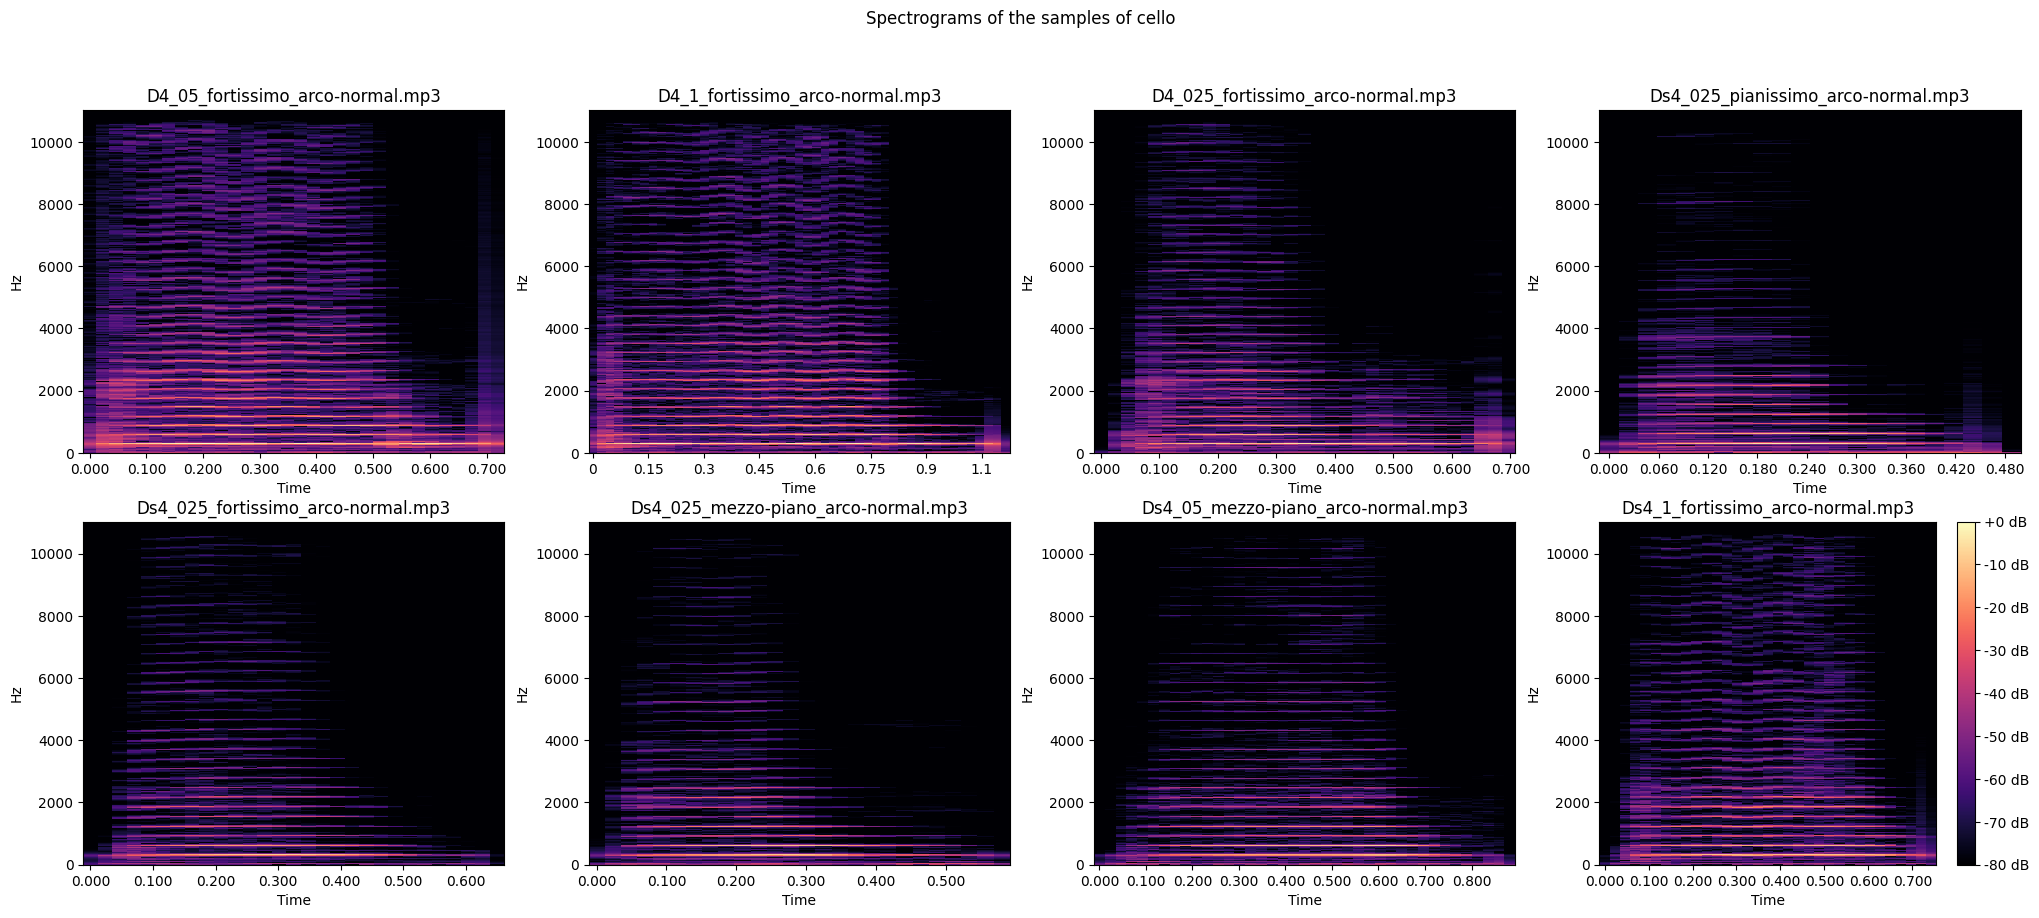

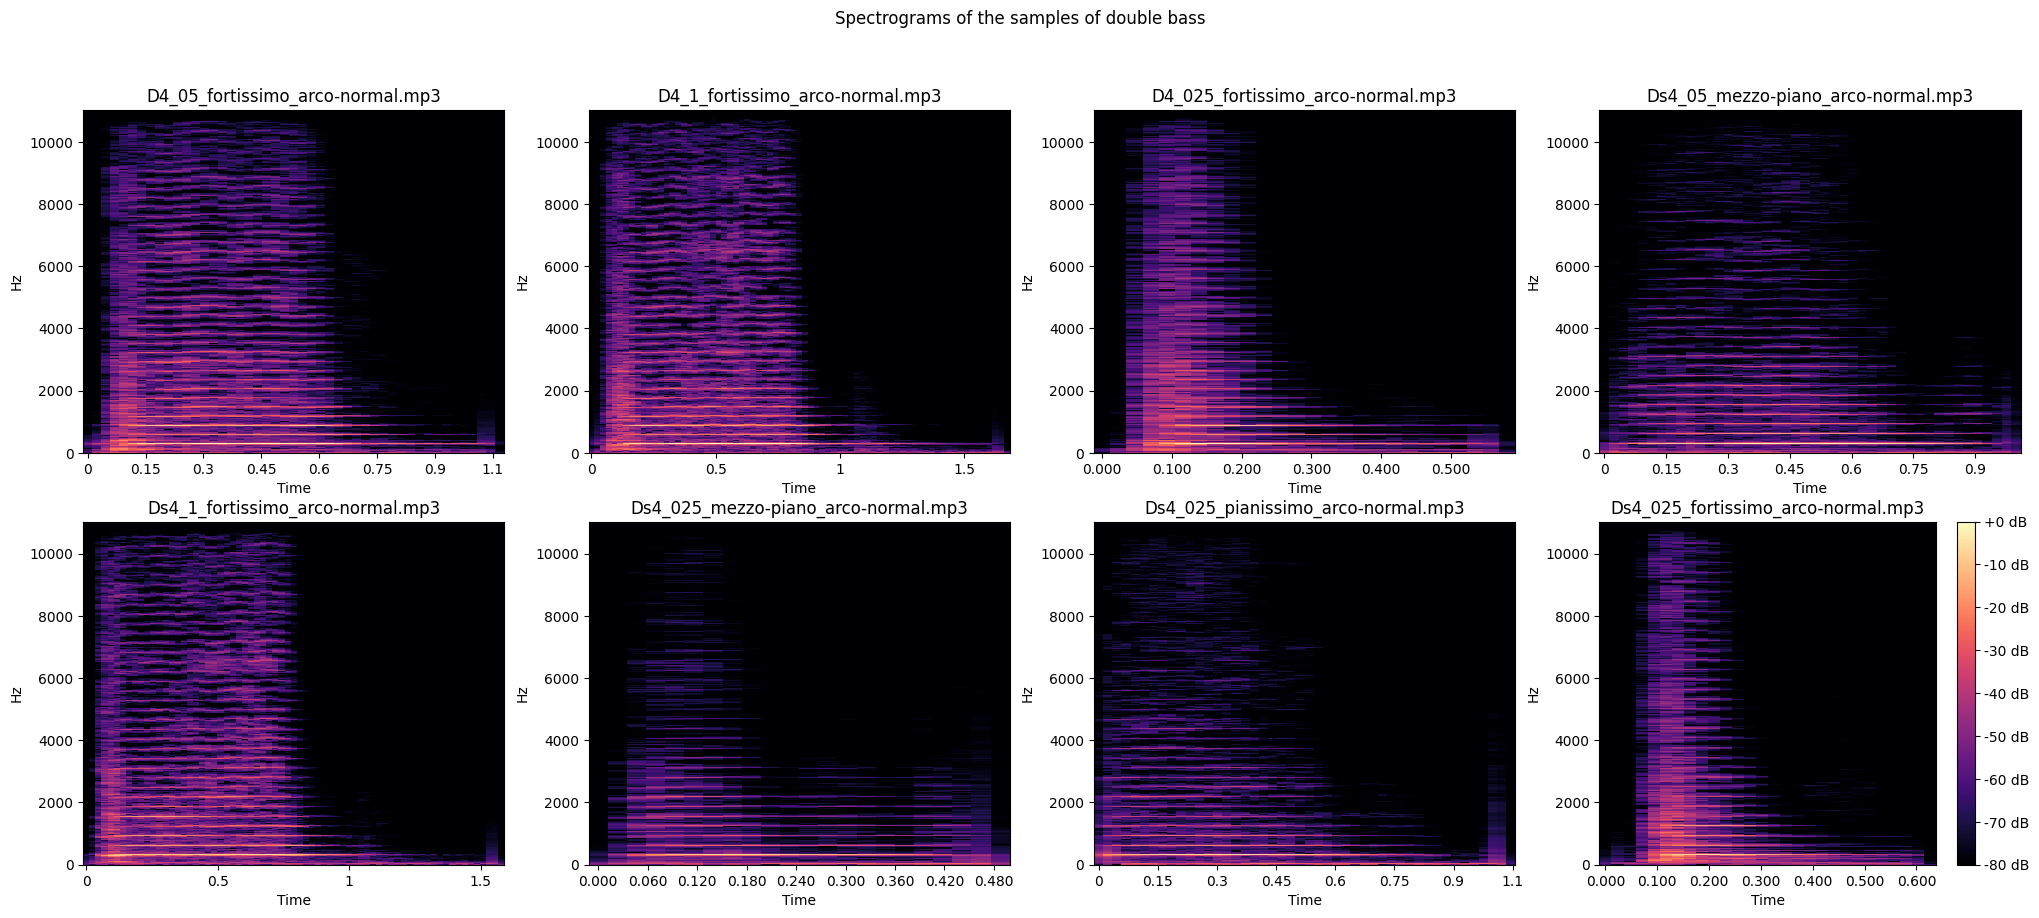

In [24]:
for inst in quartet:
  fig = plt.figure(figsize=(25, 10), dpi=100)
  fig.suptitle('Spectrograms of the samples of '+inst)
  k=0
  directory = os.listdir(dirpath+'/'+inst)
  for i in directory:
    filename=i.removeprefix('{}_'.format(inst.replace(' ','-')))
    if filename in mysounds and re.findall('(D4|Ds4)', filename):
      k+=1
      #load files
      y, sr = librosa.load(dirpath+'/'+inst+'/'+i)
      # STFT of y
      D = librosa.stft(y)  
      #amplitude
      S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max) 
      #plot
      ax = fig.add_subplot(2,4,k)
      ax.title.set_text(filename)
      img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
  fig.colorbar(img, ax=ax, format="%+2.f dB")
  plt.show()